In [ ]:
#can identify objects and track the movement
#aim to replicate the human vision to see
1. Acquiring the image
2, processing the image
3. extracting the features
4. making decision

0 - pure black absence of light , 255 - white , maximum light
356 x 356 = 126736(features)
RGB - intensity of RBG (126736x3)
high resolution images have higher number of features
(ANN ARE NOT SUITABLE)
ANN CANNOT RECOGNIZE HOW SHAPE AND TEXTURE FORM STRUCTURES TOGETHER , THEY TREAL ALL INPUT DATA AS FLAT AARAYS

WE will take the filetr and multilpy it by striding , and make the feature map . it will recognis the edge, border and curve .


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski


In [4]:
import skimage.data as data
available_images = [name for name in dir(data) if callable(getattr(data, name))]
print(available_images)

['astronaut', 'binary_blobs', 'brain', 'brick', 'camera', 'cat', 'cell', 'cells3d', 'checkerboard', 'chelsea', 'clock', 'coffee', 'coins', 'colorwheel', 'download_all', 'eagle', 'file_hash', 'grass', 'gravel', 'horse', 'hubble_deep_field', 'human_mitosis', 'immunohistochemistry', 'kidney', 'lbp_frontal_face_cascade_filename', 'lfw_subset', 'lily', 'logo', 'microaneurysms', 'moon', 'nickel_solidification', 'page', 'palisades_of_vogt', 'protein_transport', 'retina', 'rocket', 'shepp_logan_phantom', 'skin', 'stereo_motorcycle', 'text', 'vortex']


In [5]:
images = (
    'brick',
    'camera',
)

In [6]:
from skimage.data import camera, brick

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)
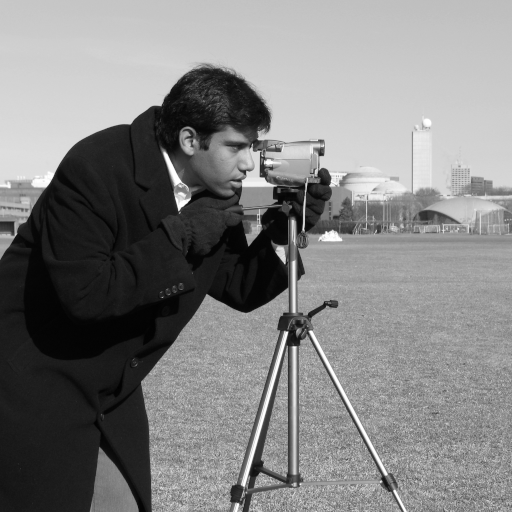

In [7]:
camera()

array([[ 99,  98,  99, ..., 166, 160, 150],
       [ 99, 100,  99, ..., 174, 167, 152],
       [ 98,  98,  98, ..., 171, 170, 156],
       ...,
       [ 99,  98, 100, ..., 179, 186, 185],
       [ 98,  98, 101, ..., 182, 185, 182],
       [ 98,  99, 102, ..., 179, 183, 176]], dtype=uint8)
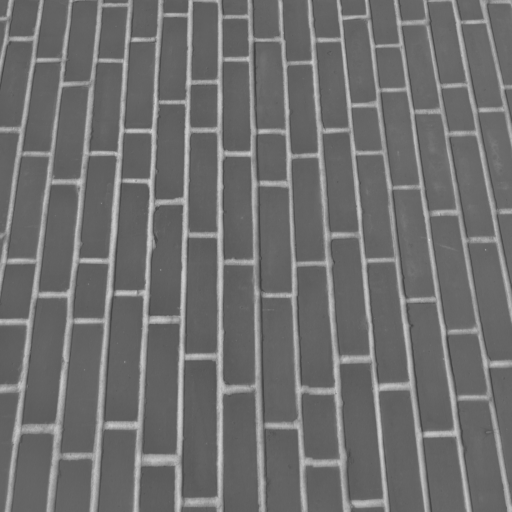

In [8]:
brick()

In [9]:
camera().shape

(512, 512)

In [10]:
brick().shape

(512, 512)

<ipython-input-11-67be414aa47d>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(camera());


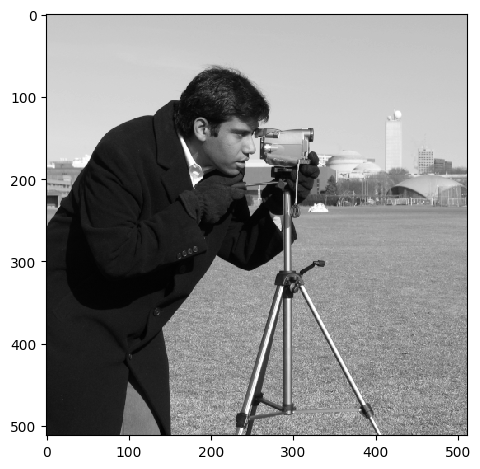

In [11]:
ski.io.imshow(camera());

<ipython-input-12-ab8c23698386>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(brick());


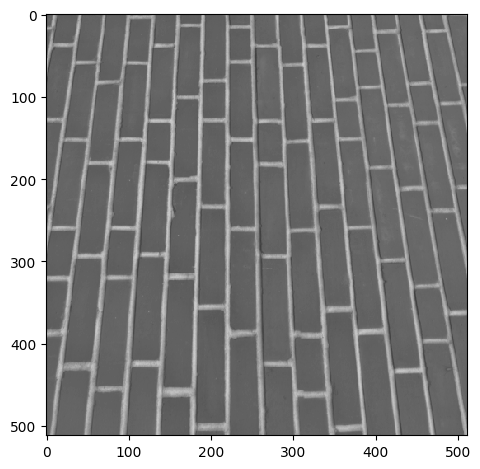

In [12]:
ski.io.imshow(brick());

In [13]:
v_filter = [[-5, 0, 5],
            [-0.5, 0, 0.5],
            [-5, 0, 5]]

In [18]:
def apply_filter(image, v_filter):
  width = image.shape[1]
  kw = len(v_filter)


  output = [[0]* width for _ in range(width)]

  for y in range(1, width - 1):
    for x in range(1, width -1):
      sum_ = 0
      for v_filter_y in range(kw):
        for v_filter_x in range(kw):
          val = image[y + v_filter_y-1][x + v_filter_x -1]
          sum_ += v_filter[v_filter_y][v_filter_x] * val
      output[y][x] = sum_
  return np.array(output)

<ipython-input-19-73f417eeee68>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(output, cmap='gray');


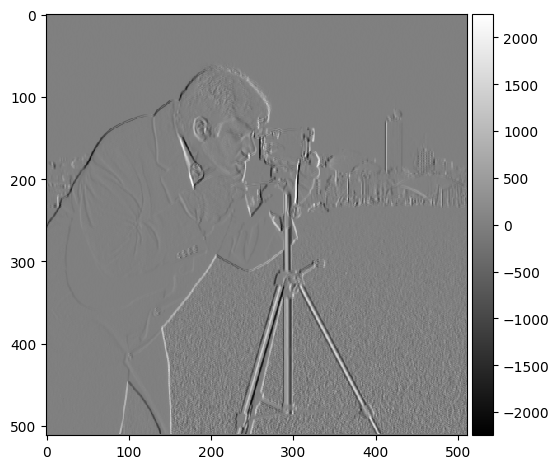

In [19]:
output = apply_filter(camera(), v_filter)
ski.io.imshow(output, cmap='gray');

<ipython-input-20-fa5cf04229d3>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(output, cmap='gray');


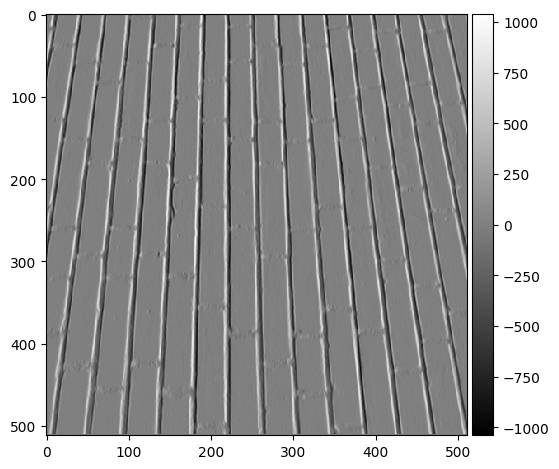

In [20]:
output  = apply_filter(brick() , v_filter)
ski.io.imshow(output, cmap='gray');

In [22]:
h_filter = [[-5, 0, 5],
            [-0.5, 0, 0.5],
            [-5, 0, 5]]

<ipython-input-23-651800f8de6e>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(output, cmap='gray');


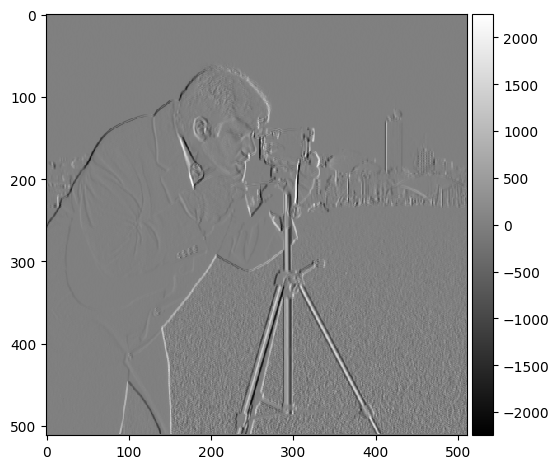

In [23]:
output = apply_filter(camera(), h_filter)
ski.io.imshow(output, cmap='gray');

<ipython-input-25-86773a01f83c>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  ski.io.imshow(output, cmap='gray');


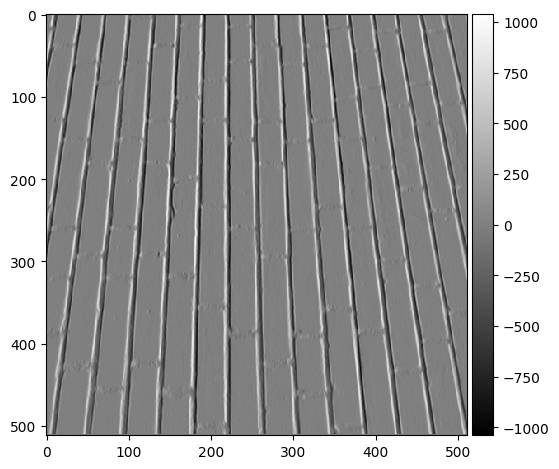

In [25]:
output = apply_filter(brick(), h_filter)
ski.io.imshow(output, cmap='gray');

In [26]:
#striding and pooling (stride =1 , makes an high resolution output , retains spatial information)
#high computational cost
#large output size not always ideal


In [ ]:
#if stride=2 #reduced computational load . #smaller output ideal for deeper networks
#some features are missed. #some loss of spatial resolution

The math behind convolution

Hout = [ (Hin - F + 2p) / s] + 1
Wout = [ (Win - F + 2p) / s] + 1

(HOUT = [ (HEIGHT - FILTER + 2PADDING) / STRIDE] + 1)
(WOUT = [ (WIDTH - FILTER + 2PADDING) / STRIDE] + 1)



Win = input image width. Example
Hin = input image height
F = Filter size
p = Padding
s = stride value

Padding - zero padding cushioned with zero (same padding ) - using this we will get the same output size as the input size .

we apply relu activation because , after the padding and filter application it might be possible that we will have neagtive values , which is not possile , because we have range from 0 to 255 , so we apply ReLu activation function to avoid the mishappen.


**POOLING** WHY ?

Problem with Conv = slow trainig , and poor performane

Pooling , downsample the feature maps , by and reduces the complexity of the image .
- Major focus on essential details rather and maintains the overall pattern an dstructure.


2 types of pooling , avg pooling and max pooling .

Building blocks for image recognition

- LeNet
- Alexnet
-VGG
-GoogleNet
- Resnet
-DenseNet
-NasNet
- MobileNet
-Efficient
